In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_store import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [5]:
sns.color_palette(cccpalette)

In [6]:
import os
os.listdir()

['.git',
 '.gitattributes',
 '.gitignore',
 '.ipynb_checkpoints',
 'calc_csat.py',
 'cluster_assignment.csv.gz',
 'doc',
 'master model notebook.ipynb',
 'model_equations_separate_NC_sep_vmax.py',
 'model_equations_separate_NC_store.py',
 'model_equations_separate_NC_store_vect.py',
 'model_NC_analyze_clusters.ipynb',
 'model_NC_cc.ipynb',
 'model_NC_cc_mechanisms.ipynb',
 'model_NC_cc_optimize.ipynb',
 'model_NC_honly.ipynb',
 'model_NC_lookup before signal resp.ipynb',
 'model_NC_lookup.ipynb',
 'model_NC_ponly.ipynb',
 'model_NC_results_strong.ipynb',
 'model_NC_salib.ipynb',
 'Model_Parameters.xlsx',
 'model_param_sensitivity.ipynb',
 'model_param_sensitivity_least_squares.ipynb',
 'model_param_sensitivity_ponly.ipynb',
 'model_param_sensitivity_ponly_pro99.ipynb',
 'model_store_cc.ipynb',
 'model_store_ponly.ipynb',
 'param_values_log.txt.gz',
 'prelim_bottle.csv',
 'prepare_data',
 'PRO_JSON',
 'README.md',
 'reference_10cc.xlsx',
 'reference_10cc_axenic.xlsx',
 'reference_pro99_

In [7]:
refdf = pd.read_excel('reference_pro99_axenic.xlsx',)


In [8]:
print_params()

Mh  = 1.16e-06, 1.00e-01
Mp  = 1.16e-06, 1.00e-01
gammaDp  = 6.00e-01, 5.18e+04
gammaDh  = 6.00e-01, 5.18e+04
Rp  = 7.00e+00, 6.05e+05
Rh  = 4.50e+00, 3.89e+05
EOp  = 1.16e-06, 1.00e-01
EIp  = 0.00e+00, 0.00e+00
EOh  = 1.16e-06, 1.00e-01
EIh  = 0.00e+00, 0.00e+00
KONp  = 1.43e-01, 1.23e+04
KINp  = 1.43e-01, 1.23e+04
KOCp  = 1.43e-01, 1.23e+04
KICp  = 1.43e-01, 1.23e+04
KONh  = 2.50e-01, 2.16e+04
KINh  = 2.50e-01, 2.16e+04
KOCh  = 2.50e-01, 2.16e+04
KICh  = 2.50e-01, 2.16e+04
VmaxONp  = 1.64e-05, 1.42e+00
VmaxINp  = 8.20e-05, 7.08e+00
VmaxOCp  = 1.28e-05, 1.11e+00
VmaxICp  = 6.40e-05, 5.53e+00
VmaxONh  = 1.50e-05, 1.30e+00
VmaxINh  = 1.50e-05, 1.30e+00
VmaxOCh  = 6.77e-05, 5.85e+00
VmaxICh  = 0.00e+00, 0.00e+00
Oh  = 1.00e+00, 8.64e+04
Op  = 1.00e+00, 8.64e+04
E_ROSp  = 6.48e-07, 5.60e-02
E_ROSh  = 4.05e-07, 3.50e-02
VmaxROSh  = 7.70e-06, 6.65e-01
K_ROSh  = 2.50e-01, 2.16e+04
ROS_decay  = 1.16e-07, 1.00e-02
MROSp  = 1.16e-07, 1.00e-02
MROSh  = 1.16e-07, 1.00e-02
MKROSp  = 1.43e-01, 1.23

In [9]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

In [70]:
param_vals = get_param_vals('OVERFLOW')
param_vals = get_param_vals('MIXOTROPH')
param_vals = get_param_vals('EXOENZYME')


In [71]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_ponly_data(param_vals, pro99_mode=True)

In [72]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = -4.13e-06, init Bp = 1.79e+00, newval = 1.79e+00
dNp/dt = 6.27e-05, init Np = 0.00e+00, newval = 6.27e-05
dCp/dt = 8.24e-06, init Cp = 0.00e+00, newval = 8.24e-06
dDON/dt = -8.27e-07, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 8.27e-07, init RDON = 0.00e+00, newval = 8.27e-07
dDIN/dt = -5.86e-05, init DIN = 8.00e+02, newval = 8.00e+02
dDOC/dt = 2.31e-05, init DOC = 1.32e+02, newval = 1.33e+02
dRDOC/dt = 5.79e-06, init RDOC = 0.00e+00, newval = 5.79e-06
dDIC/dt = -8.24e-06, init DIC = 2.24e+03, newval = 2.24e+03
dROS/dt = -2.31e-08, init ROS = 2.00e-01, newval = 2.00e-01
dABp/dt = 0.00e+00, init ABp = 0.00e+00, newval = 0.00e+00
dABh/dt = 0.00e+00, init ABh = 0.00e+00, newval = 0.00e+00


In [73]:
print_intermediate0(intermediate_func, interm_names, init_vars)


gross_uptakeINp = 6.27e-05
gross_uptakeONp = 0.00e+00
gross_uptakeICp = 3.43e-05
gross_uptakeOCp = 0.00e+00
uptakeNp = 6.27e-05
uptakeCp = 3.43e-05
regQCp = 3.00e-01
regQNp = 4.29e-01
bio_synthesisN_p = 1.71e-10
respirationCp = 2.60e-05
biomass_breakdown_for_respirationCp = -0.00e+00
netDeltaNp = 6.27e-05
netDeltaCp = 8.24e-06
store_keepNp = 1.18e-06
overflowNp = 0.00e+00
overflowCp = 0.00e+00
dic_air_water_exchange = -9.11e-18
ABreleasep = 0.00e+00
death_ratep = 1.16e-06
deathp = 2.07e-06
leakinessOp = 2.07e-06
leakinessIp = 0.00e+00
ROSreleasep = 0.00e+00
DON2DINp = 4.13e-06


In [74]:
biomass_diff0_ponly(calc_dydt, var_names,init_vars)


dBp/dt  + dDON/dt + dRDON/dt + dDIN/dt = -6.27437346947063e-05


In [75]:
var_names

['Bp',
 'Np',
 'Cp',
 'DON',
 'RDON',
 'DIN',
 'DOC',
 'RDOC',
 'DIC',
 'ROS',
 'ABp',
 'ABh']

In [76]:
init_vars

In [77]:
#sol = run_solver(calc_dydt, init_vars)
sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))

simulation time 29.03125


In [78]:
df = solver2df(sol, var_names, interm_names, intermediate_func, param_vals)

In [79]:
df.head()

,Bp,Np,Cp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,...,ABreleasep,death_ratep,deathp,leakinessOp,leakinessIp,ROSreleasep,DON2DINp,Bp[C],ABp[C],ABh[C]
0,1.785714,0.000000,0.000000,20.000000,0.000000,800.000000,132.500000,0.000000,2241.552301,0.200000,...,0.0,0.000001,0.000002,0.000002,0.0,0.0,0.000004,12.500000,0.0,0.0
1,1.734862,0.650598,0.240243,19.988293,0.011724,799.400237,132.828283,0.082071,2241.259845,0.199667,...,0.0,0.000001,0.000002,0.000002,0.0,0.0,0.000004,12.144033,0.0,0.0
2,1.704617,0.982436,0.501384,19.976889,0.023178,799.098594,133.148992,0.162248,2240.818426,0.199334,...,0.0,0.000001,0.000002,0.000002,0.0,0.0,0.000004,11.932317,0.0,0.0
3,1.691627,1.159827,0.697534,19.965657,0.034491,798.934112,133.465748,0.241437,2240.334336,0.199002,...,0.0,0.000001,0.000002,0.000002,0.0,0.0,0.000004,11.841389,0.0,0.0
4,1.690692,1.260098,0.832697,19.954501,0.045760,798.834664,133.781280,0.320320,2239.837007,0.198671,...,0.0,0.000001,0.000002,0.000002,0.0,0.0,0.000004,11.834841,0.0,0.0


In [80]:
mdf = df.melt(id_vars=['t', 'day'])

In [81]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [82]:
compute_mse(df,refdf)

,Sample,full name,Group,compare_points,MSE
0,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,15458.426297
1,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,14966.475936
2,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,14417.868836


In [83]:
refdf.columns

Index(['Date', 'day', 'Sample', 'FL', 'Group', 'predicted', 'ref_Bp',
       'full name', 't'],
      dtype='object')

In [84]:
df.min()

Bp                                     1.690692e+00
Np                                     0.000000e+00
Cp                                     0.000000e+00
DON                                    1.600000e+01
RDON                                   0.000000e+00
DIN                                    1.296061e-02
DOC                                    1.325000e+02
RDOC                                   0.000000e+00
DIC                                    4.120310e-01
ROS                                    4.940166e-02
ABp                                    0.000000e+00
ABh                                    0.000000e+00
t                                      0.000000e+00
day                                    0.000000e+00
gross_uptakeINp                        6.767573e-06
gross_uptakeONp                        0.000000e+00
gross_uptakeICp                        3.428353e-05
gross_uptakeOCp                        0.000000e+00
uptakeNp                               6.767573e-06
uptakeCp    

In [85]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol N/l')
sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol C/l')
#sns.scatterplot(data=refdf, x='day', y='Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')



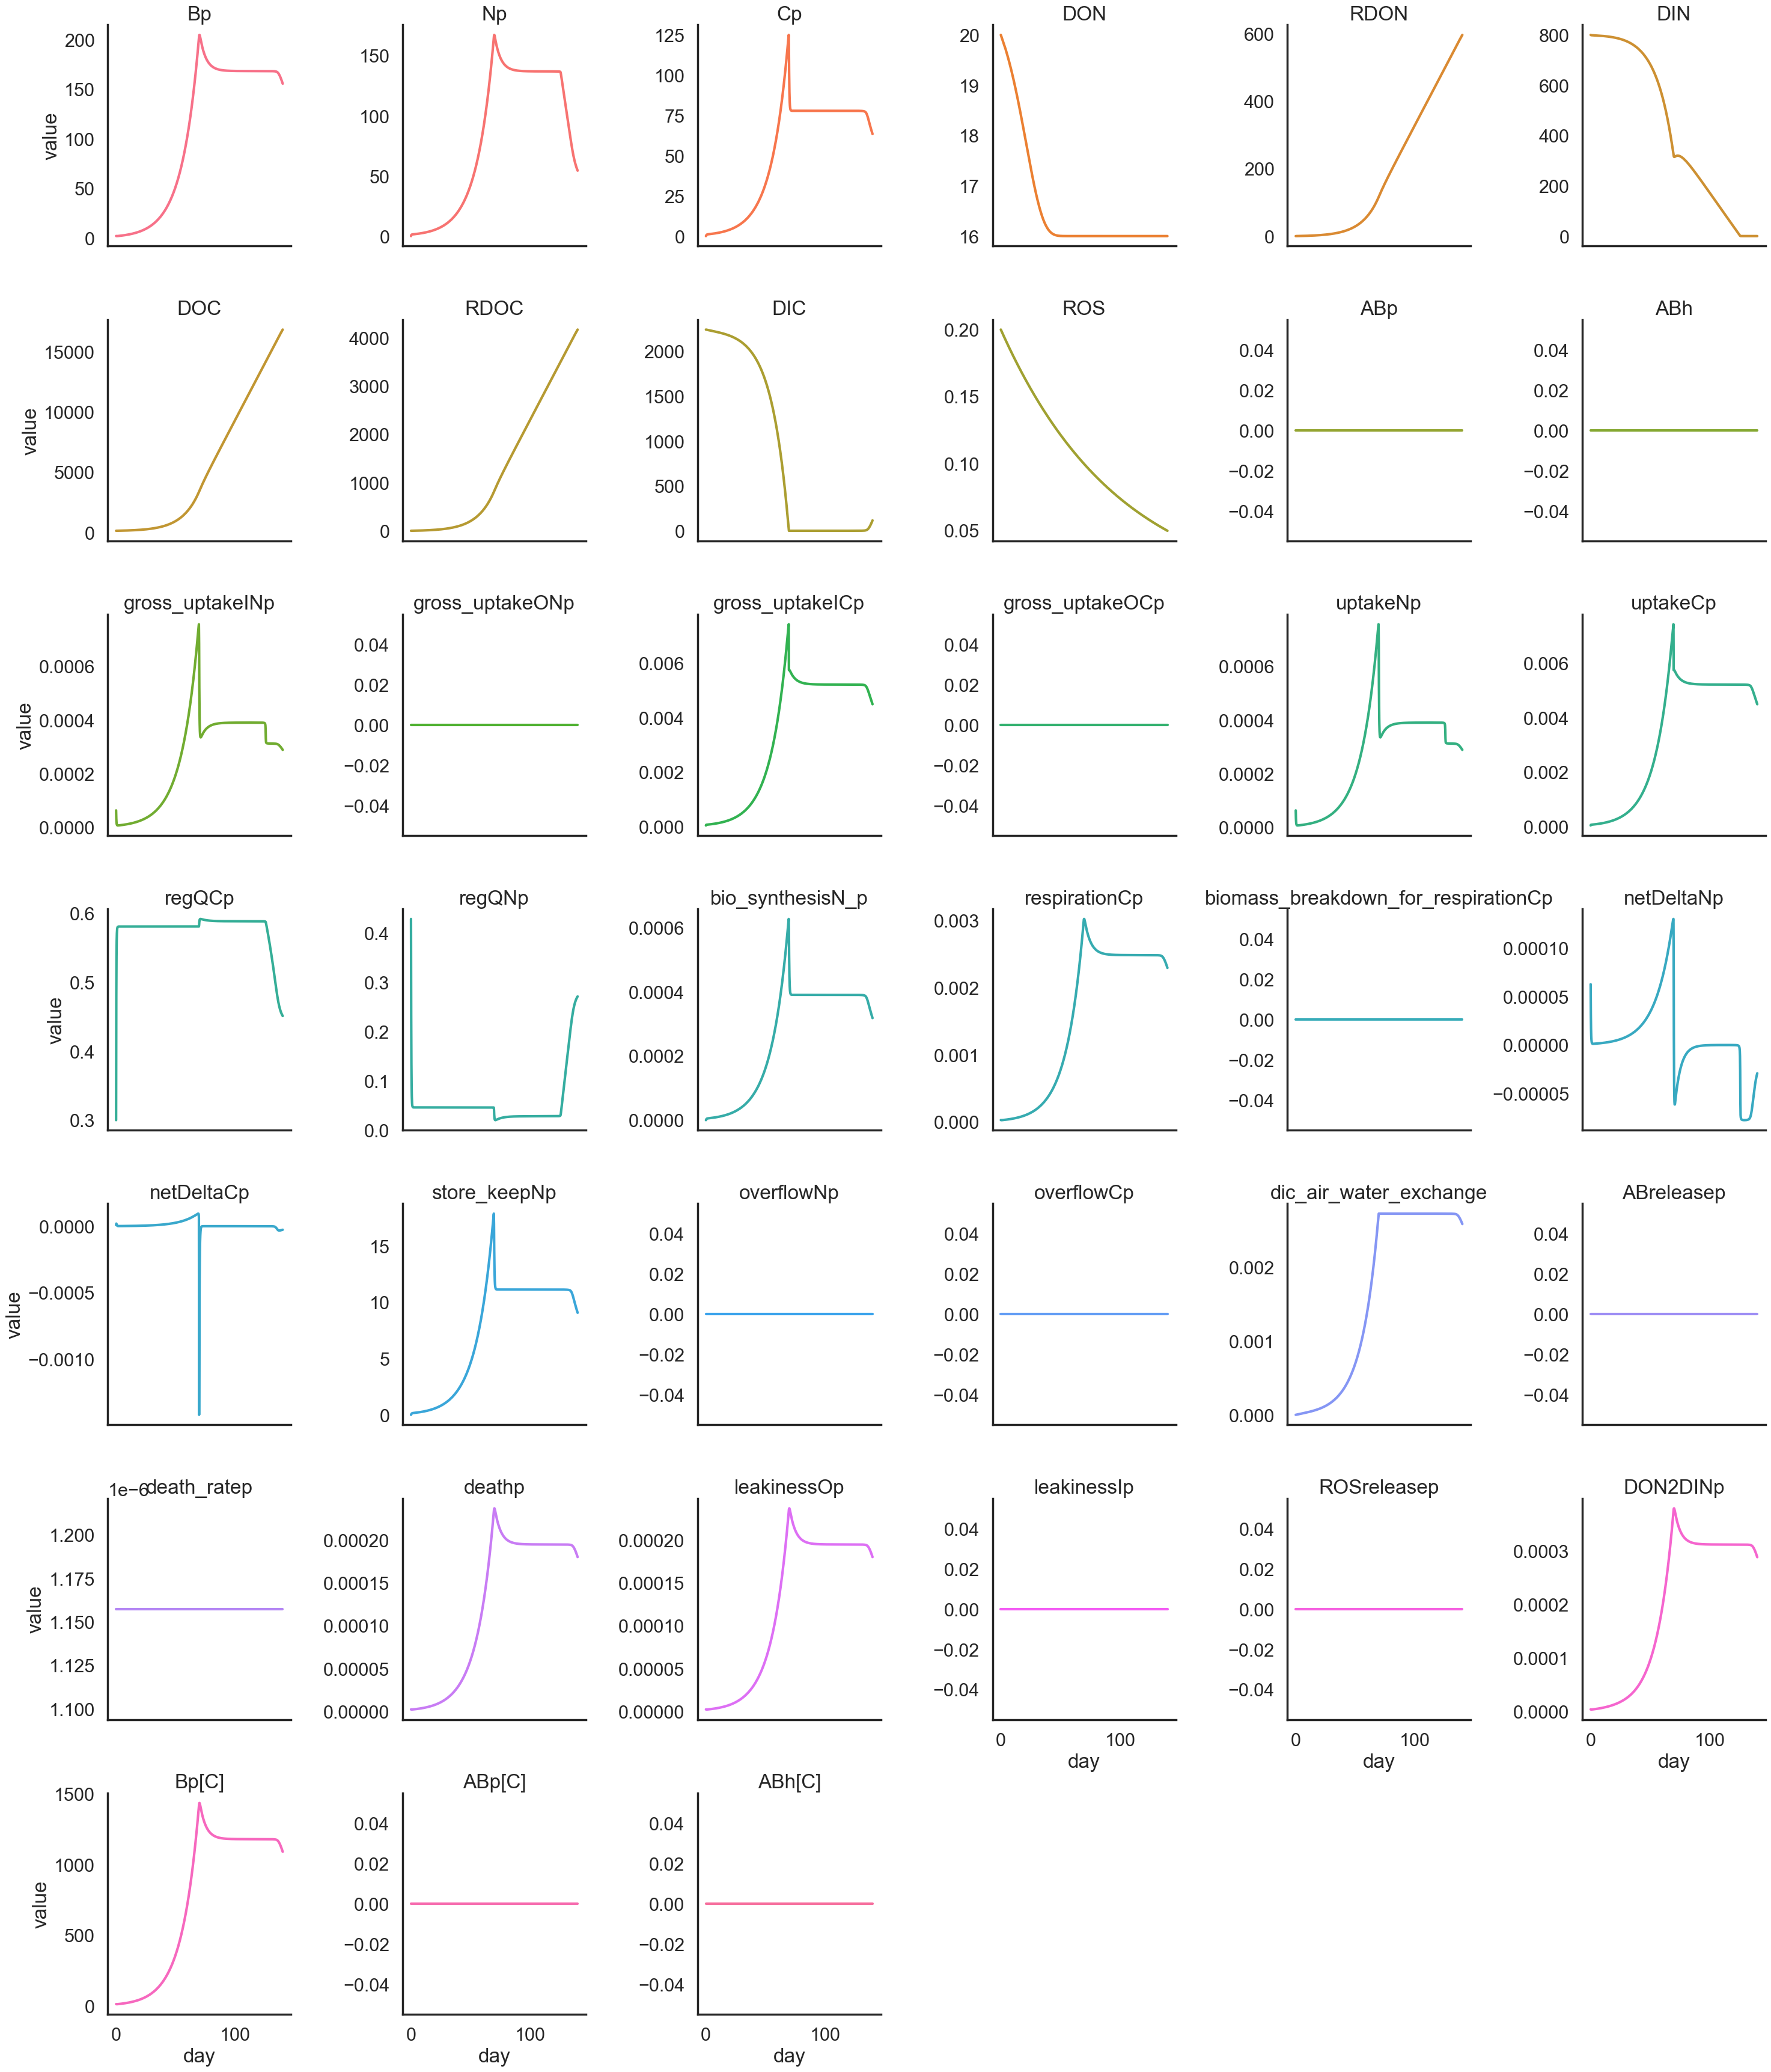

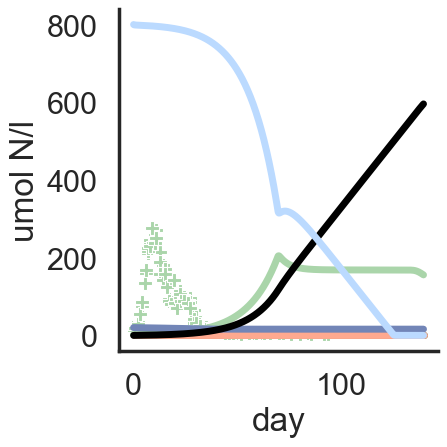

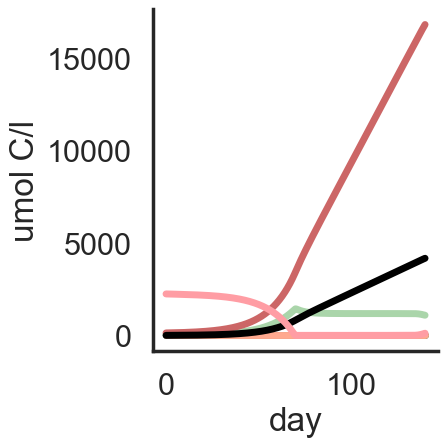

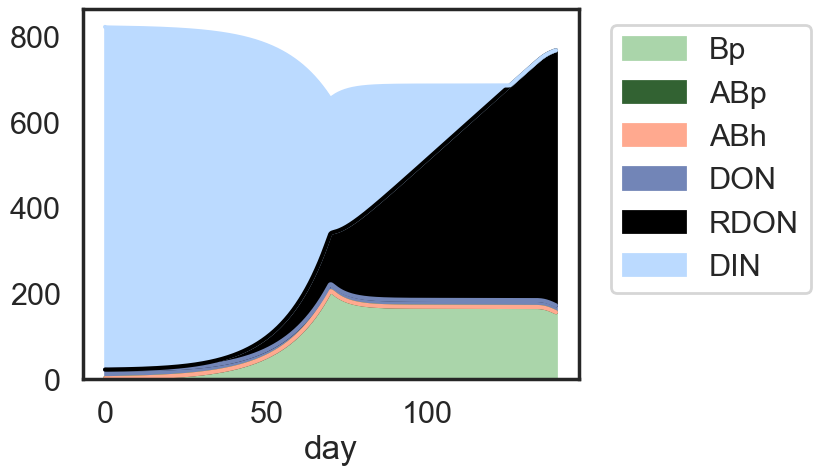

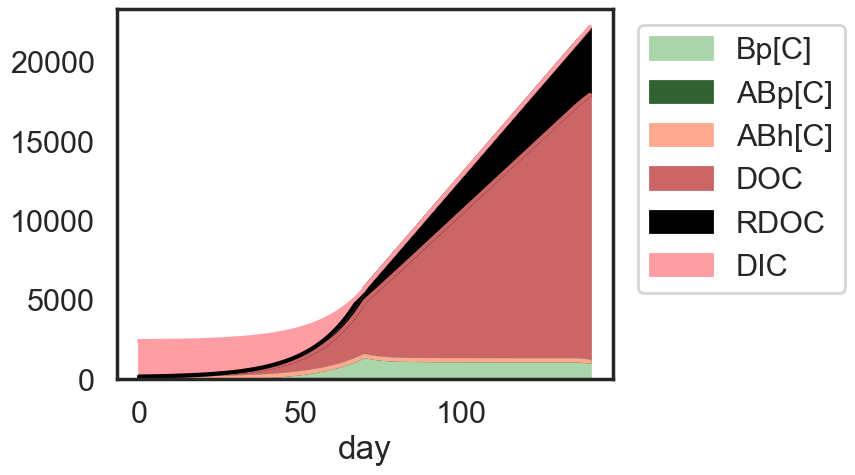

In [86]:
from matplotlib.colors import LinearSegmentedColormap
df.clip(lower=0)[pnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pnpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()
df.clip(lower=0)[pcorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pcpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()


In [87]:
len(param_vals)

In [88]:
df.min()

Bp                                     1.690692e+00
Np                                     0.000000e+00
Cp                                     0.000000e+00
DON                                    1.600000e+01
RDON                                   0.000000e+00
DIN                                    1.296061e-02
DOC                                    1.325000e+02
RDOC                                   0.000000e+00
DIC                                    4.120310e-01
ROS                                    4.940166e-02
ABp                                    0.000000e+00
ABh                                    0.000000e+00
t                                      0.000000e+00
day                                    0.000000e+00
gross_uptakeINp                        6.767573e-06
gross_uptakeONp                        0.000000e+00
gross_uptakeICp                        3.428353e-05
gross_uptakeOCp                        0.000000e+00
uptakeNp                               6.767573e-06
uptakeCp    